In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

from logistic_regression import logistic_regression

#### 28*28像素的灰度图像，每个图像代表一个手写的数字  
每行都是一行数据，表示一个数字的像素表示

In [2]:
data = pd.read_csv('.\data\mnist-demo.csv')

#### 展示25个手写数字图像进行网格布局和画布大小的设置

In [3]:
number_to_display = 25
num_cells = math.ceil(math.sqrt(number_to_display))
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

#### 读取数据集中手写数字的像素信息，并将其转换为图像显示在网格中  
- 是按照**行**读取数据的
- `data[figure_index, figure_index + 1]`得到的是一个**DataFrame**，而不是一个Series，故`.values`后得到的是二维数组1*n
- `plt.imshow`将二维数组中的数据可视化为图像，通常用于展示图像或**矩阵数据**
- `plt.tick_params`控制子图中的坐标刻度线和刻度标签的显示情况

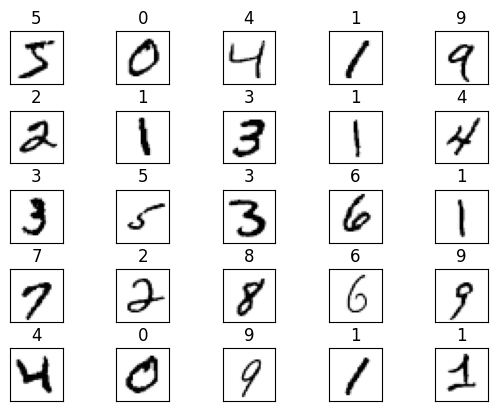

In [10]:
for figure_index in range(number_to_display):
    digit = data[figure_index:figure_index + 1].values
    digit_label = digit[0][0]
    digit_pixels = digit[0][1:]
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    frame = digit_pixels.reshape(image_size, image_size)  #改成28*28的像素

    plt.subplot(num_cells, num_cells, figure_index + 1)
    plt.imshow(frame, cmap='Greys')
    plt.title(digit_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

#### 训练集划分+训练参数
只要6000个数据集
- `train_data[:, 0]`得到的是一维数组
- `train_data[:, [0]]`得到的是二维数组

In [42]:
pd_train_data = data.sample(frac=0.8)
pd_test_data = data.drop(pd_train_data.index)

train_data = pd_train_data.values
test_data = pd_test_data.values


X_train = train_data[:, 1:]
y_train = train_data[:, [0]]
X_test = test_data[:, 1:]
y_test = test_data[:, [0]]

print(X_train.shape, y_train.shape)

(8000, 784) (8000, 1)


In [23]:
max_iter = 10000
polynomial_degree = 0
sinusoid_degree = 0
normalize_data = True

#### 逻辑回归

In [24]:
log_reg = logistic_regression(X_train, y_train, polynomial_degree, sinusoid_degree, normalize_data)
thetas, costs = log_reg.train(max_iter)

D:\假期\机器学习\西瓜书\逻辑回归代码\utils\hypothesis\sigmoid.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-matrix))


In [25]:
print(thetas.shape)

(10, 785)


#### 可视化模型训练出来的thetas
thetas的形状是（10，785），共十类， 28*28个特征

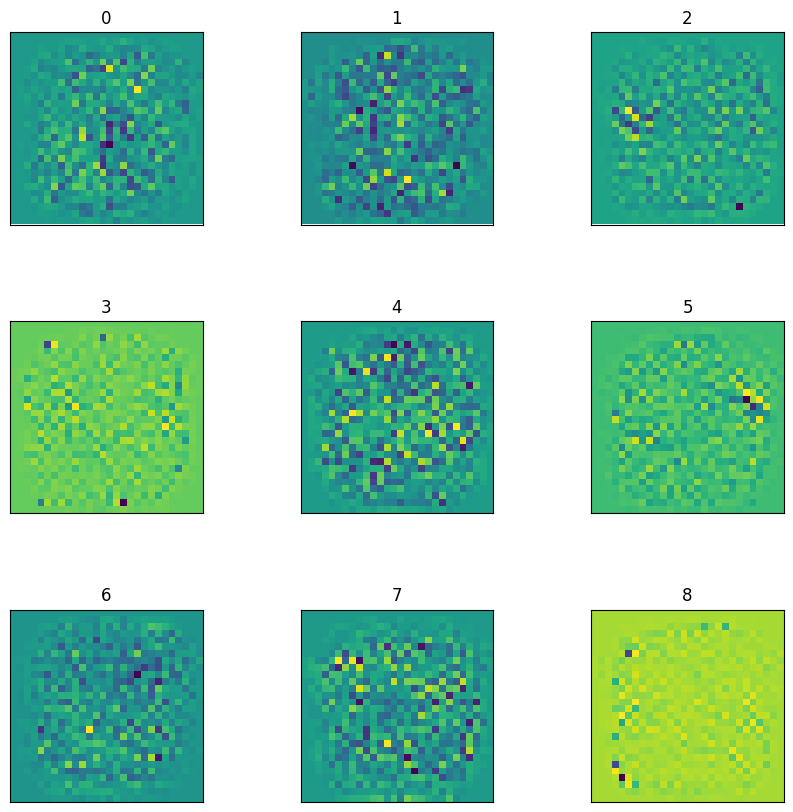

In [29]:
# print(thetas)
# pd.DataFrame(thetas)

numbers_to_display = 9
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
for plot_index in range(numbers_to_display):
    # 得到像素信息
    digit_pixels = thetas[plot_index][1:] # 二维的
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    frame = digit_pixels.reshape(image_size, image_size)
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame)
    plt.title(plot_index)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [34]:
print(len(costs))

10


#### 训练情况
绘制损失Cost 对不同的训练器（一共10个训练器，分为10类），对每个分类器有一个cost_history

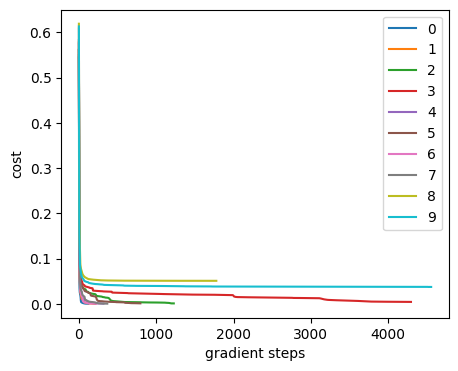

In [38]:
labels = log_reg.unique_labels

plt.figure(figsize=(5, 4))
for label_index, label in enumerate(labels):
    plt.plot(range(len(costs[label])), costs[label], label=labels[label_index])

plt.xlabel('gradient steps')
plt.ylabel('cost')
plt.legend()
plt.show()

#### 测试结果：准确率+可视化测试集中的手写数组图像

In [44]:
y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)


precision_train = np.sum(y_train_predict == y_train) / y_train.shape[0] * 100
precision_test = np.sum(y_test_predict == y_test) / y_test.shape[0] * 100
print('Training Precision {:5.4f}%'.format(precision_train))

95.875 95.39999999999999


- plt.show()要放在循环之外

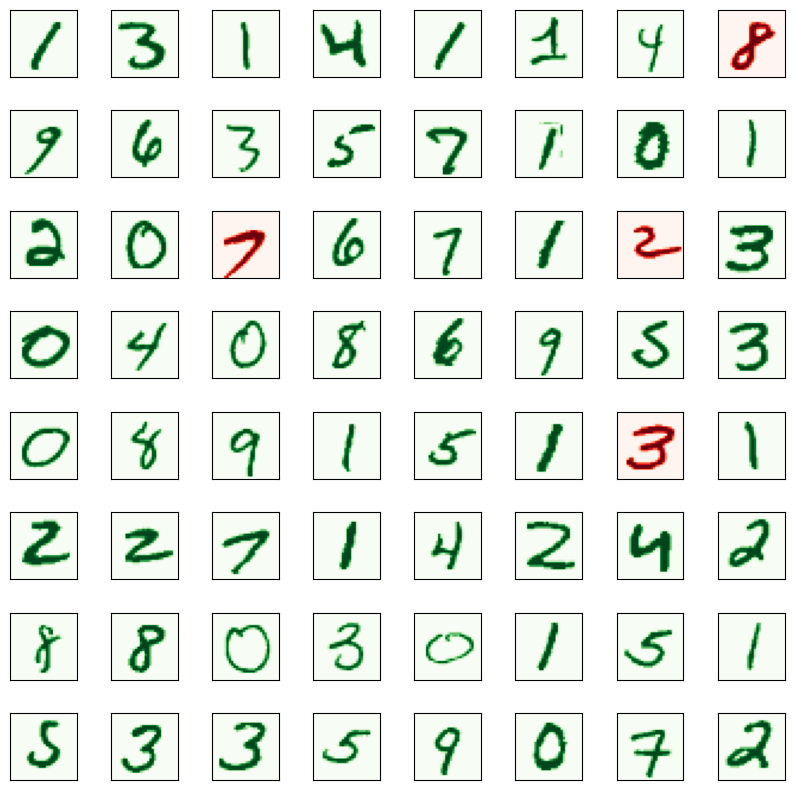

In [54]:
num_to_display = 64
cell_nums = math.ceil(math.sqrt(num_to_display))

plt.figure(figsize=(10, 10))
for plot_index in range(num_to_display):
    digit_label = y_test[plot_index, 0]
    digit_pixels = X_test[plot_index, :]

    predicted_label = y_test_predict[plot_index][0]
    image_size = int(math.sqrt(digit_pixels.shape[0]))

    frame = digit_pixels.reshape(image_size, image_size)
    
    color_map = 'Greens' if predicted_label == digit_label else 'Reds'
 
    plt.subplot(cell_nums, cell_nums, plot_index + 1)
    plt.imshow(frame, cmap = color_map, label=predicted_label)
    # plt.title(predicted_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()